# Základy práce s Python v Google API - Vision
Python lze použít jako základní scriptovací jazyk, nebo jako silný programovací jazyk s objekty a vlasními knohovnami. V tomto cvičení budeme využívat ukázek spouštěšní scriptů v prostředí jupyter, které umožňuje interaktivní práci s jazykem Python. Detaily na (https://jupyter.org/).

Příkazy se zpracovávají jeden po druhém, symbol ukončení je konec řádku, vnitřní blok se odděluje tabulátorem

# Google API a instalace knihoven
Klíčové knihovny, které budeme používat pro práci s google api jsou k dispozici v rámci instalačních balíků pomocí pip (https://pip.pypa.io/en/stable/) nebo přes nástroj Anaconda (https://www.anaconda.com/) (již máte nainsotalované na vašich virtuálních strojích). Konkrétní knihovny, které budeme potřebovat jsou nálsedující:
- `google-cloud-language` pro analýzu jazyka
- `google-cloud-vision` pro analýzu pbrazu
- `google-cloud` zastřešující balík, pokud nechcete načítat jednotlivé balíky 
- `google-oauth` pro zajištění snadné autentizace

Je důležité vědět, jak si potřebné knihovny do Python nainstalovat. K tomu slouží příkaz

```pip install --user --upgrade google-cloud-language google-cloud google-cloud-vision google-oauth matplotlib ipython```,

který spusťte v příkazové řádce (Windows => Start => Command prompt)

Základem jazyka Python je práce s knihovnami a kontrola, že vše je správně nainstalované. Načtení knihovan a ověření provedeme pomocí následujícího příkazu:

In [1]:
from google.cloud import vision
from google.oauth2 import service_account

V případě, že se vám povedlo předchozí příkazy spustit bez chybových hlášek, je vše korektně nainstalováno a je možné začít pracovat s Google API. Než k tomu přistoupíme, bude potřeba ještě nahrát knihovny pro práci s obrázky

In [2]:
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import io

Dalším kontrolním bodem je schopnost přihlásit se k vašemu účtu z Python, k tomu slouží následující příkazy. Je potřeba začít s tím, aby jste již vygenerovaný soubor s přihlašovacími údaji zpřístupnili pythony:

In [3]:
creds = service_account.Credentials.from_service_account_file('./credentials.json')

In [4]:
client = vision.ImageAnnotatorClient(credentials=creds)

Začneme jednoduchým testem funkčnosti API na jednom obrázku, odkaz na název dejme do proměnné:

In [5]:
soubor = './data/tym1/110000.jpg'

Načteme obrázek ze souboru:

In [6]:
with io.open(soubor, 'rb') as image_file:
    content = image_file.read()

Předáme obrázek do Google knihovny ```vision```:

In [7]:
image = vision.Image(content = content)

Nyní můžeme odeslat obrázek ke zpracování pomocí Google API a získat popis obrázku pomocí funkce ```label_detection```. Detail k funkci najdete na následujících stránkách (https://googleapis.dev/python/vision/latest/vision_v1/services.html).

In [8]:
response = client.label_detection(image = image)

Výstup je k dispozici v pomocí funkce ```label_annotations```

In [9]:
labels = response.label_annotations

Než si projdeme popisky obrázku vrácené funkcí Google API, podívejme se na obrázek.

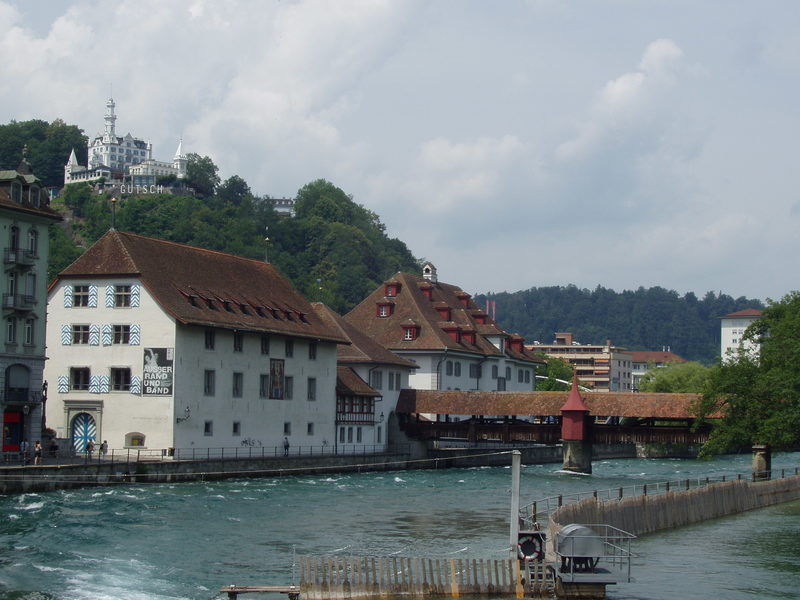

In [10]:
Image(soubor)

Nyní se podívejme, jaké ```Labels``` nám Google API vrátil:

In [11]:
print('Labels:')
for label in labels:
    print(label.description)

Labels:
Water
Town
Building
House
Bank
Lake
Channel
Cumulus
Roof
Hill station


# Nyní trocha automatizace
projdeme všechny soubory v adresáři a provedeme analýzu na nich:

In [12]:
import os

In [13]:
path = './data/tym1'

In [14]:
def get_labels(image):
    with io.open(image, 'rb') as image_file:
        content = image_file.read()
    image = vision.Image(content = content)
    labels = client.label_detection(image=image).label_annotations
    return labels

In [15]:
labels_images = {}

In [16]:
directories = os.listdir(path)

In [17]:
for i in directories:
    lbls = get_labels(os.path.join(path, i))
    lbl_set = [i.description for i in lbls]
    labels_images[os.path.join(path, i)] = lbl_set

In [18]:
print(labels_images)

{'./data/tym1\\110000.jpg': ['Water', 'Town', 'Building', 'House', 'Bank', 'Lake', 'Channel', 'Cumulus', 'Roof', 'Hill station'], './data/tym1\\110302.jpg': ['Cannon', 'Watercraft', 'Lake', 'Boat', 'Channel', 'Reservoir', 'Harbor', 'Water transportation', 'Bay', 'Dock'], './data/tym1\\110702.jpg': ['Facade', 'Building', 'Balcony', 'Material property', 'Urban design', 'Apartment', 'Symmetry'], './data/tym1\\112301.jpg': ['Mountainous landforms', 'Mountain range', 'Natural environment', 'Highland', 'Pasture', 'Bovine', 'Natural landscape', 'Ridge', 'Hill', 'Mountain'], './data/tym1\\112402.jpg': ['Mountainous landforms', 'Mountain range', 'Highland', 'Natural landscape', 'Valley', 'Mountain', 'Glacial landform', 'Ridge', 'Tarn', 'Hill station'], './data/tym1\\112406.jpg': ['Mountainous landforms', 'Natural landscape', 'Mountain range', 'Water resources', 'Highland', 'Landscape', 'Mountain', 'Bank', 'Glacial landform', 'Summit'], './data/tym1\\113900.jpg': ['Window', 'Neighbourhood', 'Res

In [19]:
tags = {}
for k, v in labels_images.items():
    for j in v:
        pocet = tags.get(j, [0, []])[0] + 1
        seznam = tags.get(j, [0, []])[1]
        seznam.append(k)
        tags[j] = [pocet, seznam]

In [20]:
sort_tabs = sorted(tags.items(), key = lambda x: x[1], reverse = True)

In [21]:
print(sort_tabs[0])

('Neighbourhood', [4, ['./data/tym1\\113900.jpg', './data/tym1\\116402.jpg', './data/tym1\\117001.jpg', './data/tym1\\122001.jpg']])


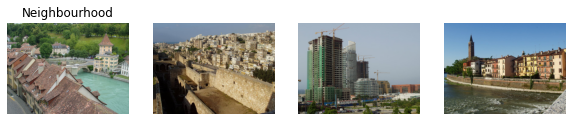

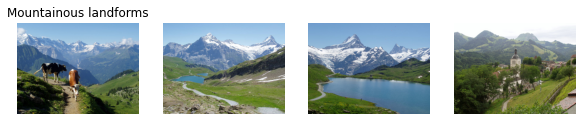

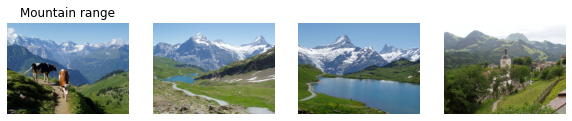

In [22]:
for k in range(3):
    pocet = sort_tabs[k][1][0]
    f, ax = plt.subplots(1, pocet, figsize = (10, 10))
    ax[0].set_title(sort_tabs[k][0])

    for i in range(pocet):
        ax[i].imshow(imread(sort_tabs[k][1][1][i]))
        ax[i].axis('off')

    plt.show()